In [140]:
# import libraries
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
pd.plotting.register_matplotlib_converters()

## I. Introduction

https://www.kaggle.com/henriqueyamahata/bank-marketing

### Input variables:
* Bank client data:
   1. age (numeric)
   2. job : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")
   3. marital : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)
   4. education (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")
   5. default: has credit in default? (categorical: "no","yes","unknown")
   6. housing: has housing loan? (categorical: "no","yes","unknown")
   7. loan: has personal loan? (categorical: "no","yes","unknown")
* Related with the last contact of the current campaign:
   8. contact: contact communication type (categorical: "cellular","telephone") 
   9. month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
   10. day_of_week: last contact day of the week (categorical: "mon","tue","wed","thu","fri")
   11. duration: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
* Other attributes:
   12. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
   13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
   14. previous: number of contacts performed before this campaign and for this client (numeric)
   15. poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")
* Social and economic context attributes
   16. emp.var.rate: employment variation rate - quarterly indicator (numeric)
   17. cons.price.idx: consumer price index - monthly indicator (numeric)
   18. cons.conf.idx: consumer confidence index - monthly indicator (numeric)
   19. euribor3m: euribor 3 month rate - daily indicator (numeric)
   20. nr.employed: number of employees - quarterly indicator (numeric)

### Output variable (desired target):
  21. y - has the client subscribed a term deposit? (binary: "yes","no")

### Missing Attribute Values:
There are several missing values in some categorical attributes, all coded with the "unknown" label. These missing values can be treated as a possible class label or using deletion or imputation techniques. 


## 0. Introduction

## I. Business Understanding

## II. DATA UNDERSTANDING

In [141]:
# get data banking marketing from file
file_path = "data/bank-additional-full.csv"
marketing_df = pd.read_csv(file_path,sep = ";")
marketing_df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
marketing_df.info()

# Thông tin tổng quan về bộ data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [49]:
categorical = marketing_df.dtypes[marketing_df.dtypes == 'object'].index.tolist()
numerical = marketing_df.dtypes[marketing_df.dtypes != 'object'].index.tolist()
print('numerical: '+str(len(numerical))+': '+str(numerical))
print('categorical: '+str(len(categorical))+': '+ str(categorical))

# Danh sách biến số và biến phân loại

numerical: 10: ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
categorical: 11: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']


In [94]:
len(marketing_df[marketing_df.duplicated(keep='first')])

# Số dòng trùng nhau

12

In [43]:
#pdays = 999 --> trước đó chưa contacted
# define NA values:

na_lst = ["NA","","#NA","unknown","nonexistent"]
marketing_df = pd.read_csv(file_path, sep=';', na_values = na_lst, keep_default_na = True)

def missing_exploration(data):
    total = data.isnull().sum().sort_values(ascending=False)
    percent = round((data.isnull().sum()/data.isnull().count()*100),2).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent %'])
    return missing_data

missing_exploration(marketing_df)

# Tỉ lệ Missing của các biến

,Total,Percent %
poutcome,35563,86.34
default,8597,20.87
education,1731,4.20
housing,990,2.40
loan,990,2.40
job,330,0.80
marital,80,0.19
y,0,0.00
day_of_week,0,0.00
contact,0,0.00


In [24]:
#pdays = 999 --> trước đó chưa contacted
len(marketing_df[marketing_df['pdays'] == 999])/len(marketing_df) * 100

# Tỉ lệ missing của cột 'pdays'

96.32174419733903

In [74]:
y_cnt = marketing_df.groupby('y').size().iloc[0]
y_name = marketing_df.groupby('y').size().index[0]
n_cnt = marketing_df.groupby('y').size().iloc[1]
n_name = marketing_df.groupby('y').size().index[1]
print("Tỉ lệ "+ str(y_name)+" label: " +str(y_cnt/(y_cnt+n_cnt)))
print("Tỉ lệ "+ str(n_name)+" label: " +str(n_cnt/(y_cnt+n_cnt)))

# Tỉ lệ các loại nhãn của biến targer

Tỉ lệ no label: 0.8873458288821987
Tỉ lệ yes label: 0.11265417111780131


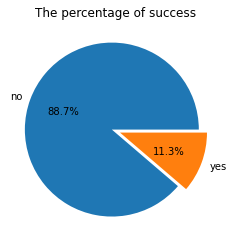

In [53]:
# marketing_df.groupby('y').size().sort_values(ascending=False).plot.pie(figsize=(15, 4),title = 'Target',autopct='%1.2f%%');
data = marketing_df.groupby('y').size().sort_values(ascending=False)
plt.pie(x=data , autopct="%.1f%%", explode=[0.05]*len(data), labels=data.index.tolist());
plt.title("The percentage of success");

# Visualization of the target

In [112]:
# đọc lại data:
marketing_df = pd.read_csv(file_path, sep=';')
marketing_df.shape

(41188, 21)

In [113]:
# xóa các dòng trùng nhau
marketing_df=marketing_df.drop(marketing_df[marketing_df.duplicated()].index).reset_index(drop=True)
marketing_df.shape

(41176, 21)

### Summary

Bộ Data được lấy từ một nghiên cứu vào năm 2014 của  UCI Machine Learning Repository dùng để dự đoán sự thành công của chiến dịch marketing bằng hình thức gọi điện của 1 ngân hàng ở Thổ Nhĩ Kỳ. Khảo sát tổng quan dữ liệu, ta nhận thấy:
1. Bộ dữ liệu có 41188 dòng và 21 cột, trong đó có 10 biến số và 11 biến phân loại. Ngoài ra, các biến này chứa các dữ liệu về khách hàng, thông tin về marketing và các chỉ số kinh tế và xã hội của khách hàng.
2. Bộ dữ liệu có 12 dòng trùng nhau, chiếm tỉ lệ rất nhỏ

### Target
1. Bộ dữ liệu có 88.7% nhãn 'no' và 11.3% nhãn 'yes', điều này chỉ ra rằng bộ dữ liệu nghiên cứu không cân bằng giữa tỉ lệ các kết quả thu được. Nó đồng thời cũng cho thấy rằng ngân hàng này đã thực hiện chiến dịch call marketing này một cách không tính toán nên tỉ lệ thành công thật sự thấp.

### Missing
1. Cột 'pdays', giá trị missing '999' chiếm rất cao (96.32%)
2. Cột 'poutcome' có tỉ lện missing đứng thứ nhì (86.34)
3. Cột'default' có tỉ lệ missing là 20.87 xếp ở vị trí thứ 3
4. Các cột khác education, housing, loan, job, marital tỉ lệ missing không đáng kể

### Thông tin chưa rõ
1. Các biến: emp.var.rate, cons.price.idx, cons.conf.idx, euribor3m	được thu thập dữ liệu như thế nào



## III. Data Exploration

### Analysis: numerical

In [6]:
# Statistic các biến numerical:
marketing_df.describe()

# Khảo sát các thông số thống kê của các biến numerical

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


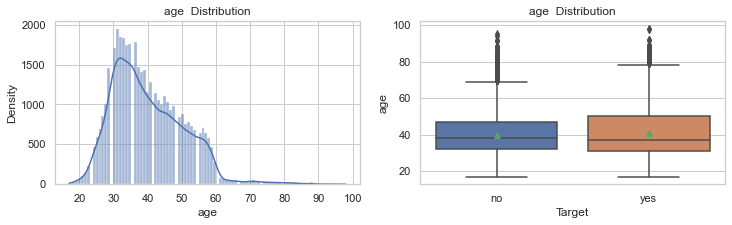

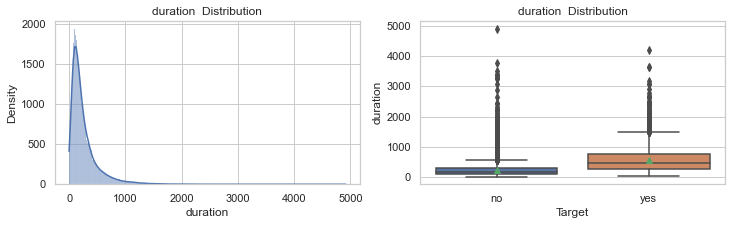

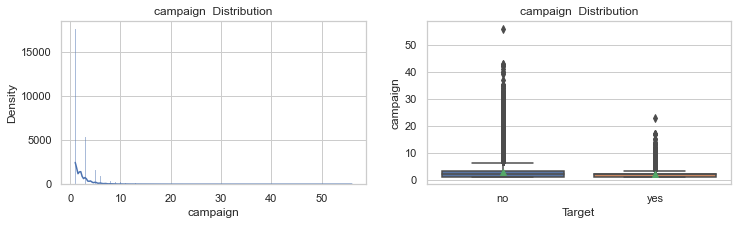

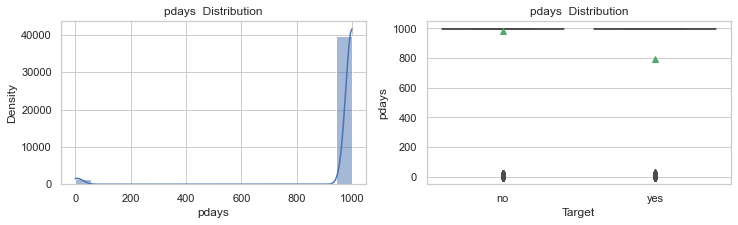

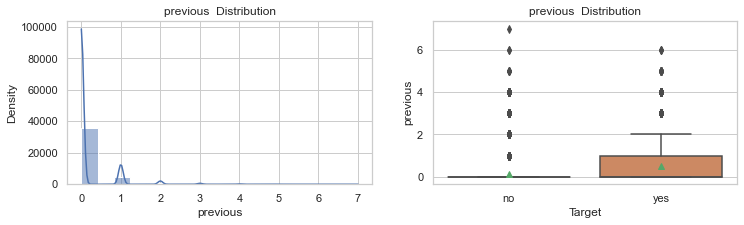

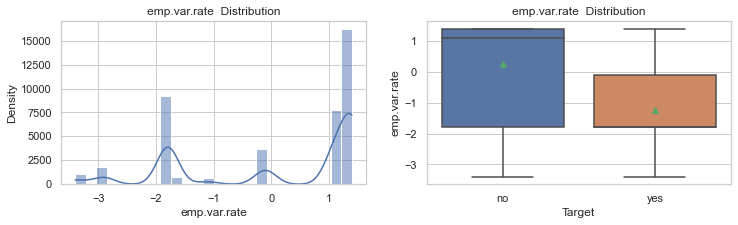

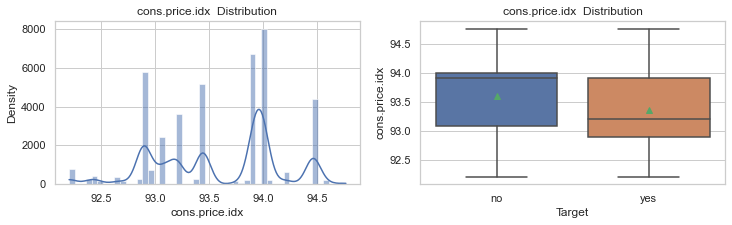

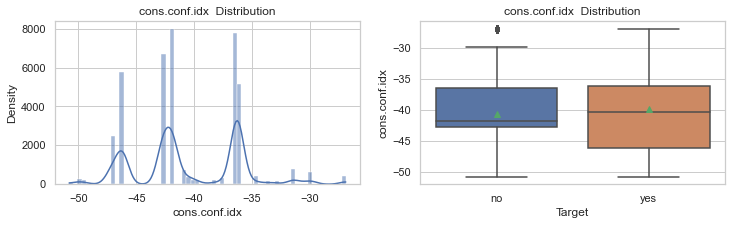

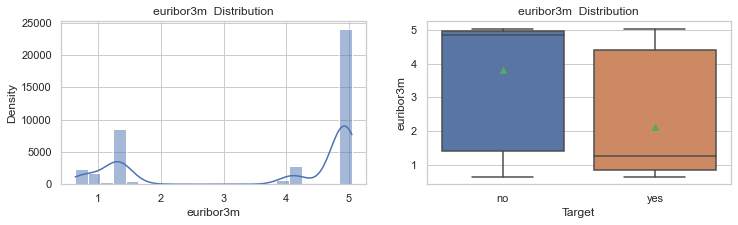

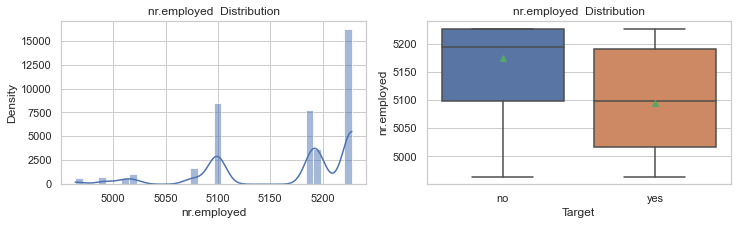

In [164]:
# Visualization các biến numerical:

numerical = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
             'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

for column in numerical:
    fig, (ax1,ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 3));
    
    sns.histplot(marketing_df[column], ax=ax1, kde=True);
    ax1.set_xlabel(column);
    ax1.set_ylabel('Density');
    ax1.set_title(f'{column}  Distribution');

    sns.boxplot(x='y', y=column, data=marketing_df, showmeans=True, ax=ax2);
    ax2.set_xlabel('Target');
    ax2.set_ylabel(column);
    ax2.set_title(f'{column}  Distribution');

    plt.show();
    print();

# Distribution các biến numerical:

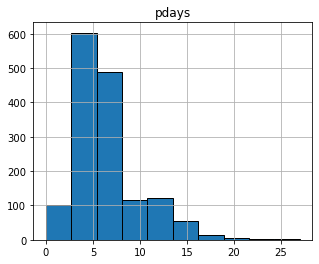

In [64]:
# Loại bỏ các giá trị '999' của pdays

data = marketing_df[marketing_df.pdays != 999]
plt.title('pdays')
data['pdays'].hist(figsize=(5,4),edgecolor='k', bins=10);

# Distribution of  'pdays'

(I). Numerical variables's Summary

* Đa số khách hàng ở độ tuổi từ 30 - 50 tuổi. Những khách hàng đồng ý gởi tiền tập trung ở độ tuổi 30-50
* Đa số chưa được tiếp xúc qua điện thoại ở các chiến dịch quảng cáo trc đó
* Đối với chiến dịch tiếp thị hiện tại, đa số các khách hàng chưa được tiếp xúc qua điện thoại lần nào. Tỉ lệ thành công tập trung cao vào những đối tượng này.
* Các biến social/economic variable chưa rõ
* Đối với những clients xác định đc ngày liên hệ gần nhất, đa số nằm trong khoảng 4-7 ngày
* Đối với hệ số em.var.rate (hệ số thay đổi công việc): KH được tiếp thị có tỉ lệ thay đổi công việc nằm từ -2 đến 1.2. Đặc biệt, những KH đồng ý gởi tiền đều có tỉ lệ này <0 (Không thay đổi công việc)
* Euribo3m: nằm trong khoảng từ 1-5, nremployed nằm trong khoảng 5010 - 5210. Nhìn chung, tỉ lệ trung bình của các chỉ số này ở những người đồng ý gởi tiền đều thấp hơn những người ko đồng ý gởi
* Hệ số cón.price.idx của khách hàng được gọi nằm trong khoảng 93-94. Tỉ lệ trung bình ở những người đồng ý gởi thấp hơn những người ko gởi
* Ngược lại là hệ số cons.conf.ind, tỉ lệ trung bình ở những khách hàng tiếp thị thành công lại cao hơn. Tỉ lệ này nằm trong khoảng từ -45 đến -37

Đa số khách hàng được gọi điện có:
* Công việc chủ yếu là blue-collar (công nhân), admin, technician, đã có gia đình và chưa có thẻ tín dụng và đa số không có các khoản nợ cá nhân
* khoảng 65% khách hàng được call qua cellular
* Không có sự phân biệt rõ ràng giữa các giá trị day_of_week của cuộc gọi gần nhất, nhưng có sự khác nhau về month của nó. Có đến 1/3 số cuộc gọi gần nhất được thực hiện trong tháng 5

Những chú ý:
* Cột 'duration' sẽ không được quan tâm trong quá trình phân tích và xử lý
* Có 12 dòng trùng nhau sẽ cắt bỏ

Missing: 7 columns
* Pdays
* poutcome
* các giá trị unknown của các cột khác: loan, housing, default, marital, job


Outlier:
* Age, campain, previous, cons.conf.idx


### Analysis: categorical

In [93]:
def get_col_target(rows, cols,data):
    
    cols_lst = data[cols].unique().tolist()
    rows_lst = data.groupby(rows)[rows].count().sort_values(ascending = False).index.tolist()

    group_df = data.groupby([rows,cols]).size()
    dic = {}
    for item in cols_lst:
        vals = []
        for i in rows_lst:
            try:
                vals.append(group_df.loc[(i, item)])
            except:
                vals.append(0)
            finally:
                continue
        dic[item] = vals

    df = pd.DataFr

In [159]:
marketing_df.describe(include = 'object')

# Statistic các biến categorical:

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41176,41176,41176,41176,41176,41176,41176,41176,41176,41176,41176
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10419,24921,12164,32577,21571,33938,26135,13767,8618,35551,36537


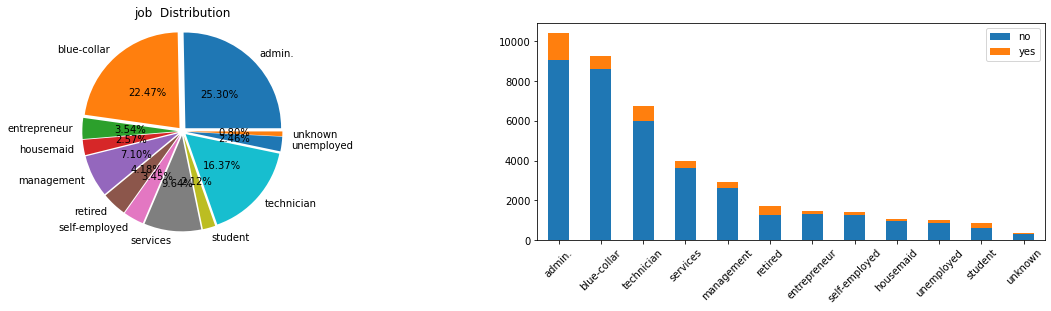

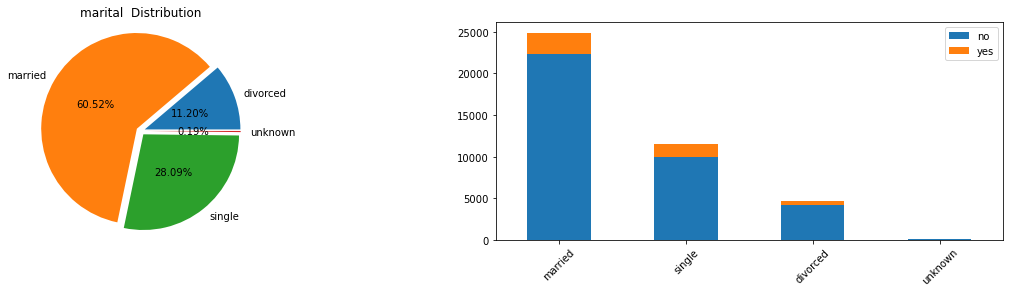

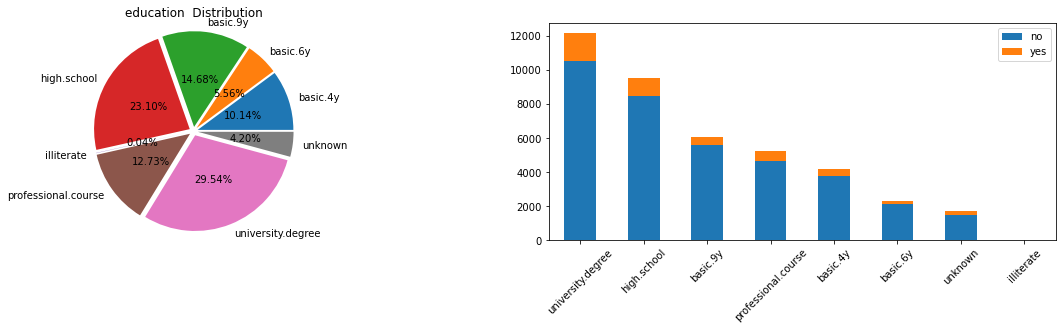

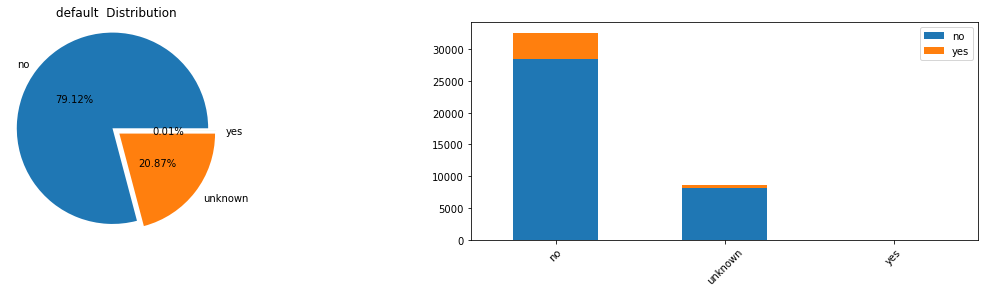

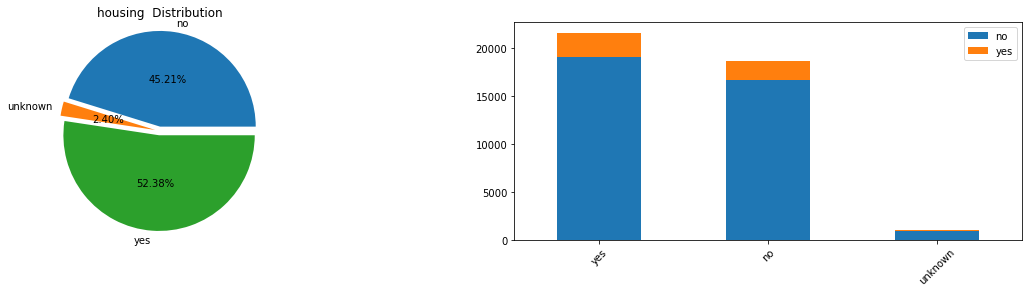

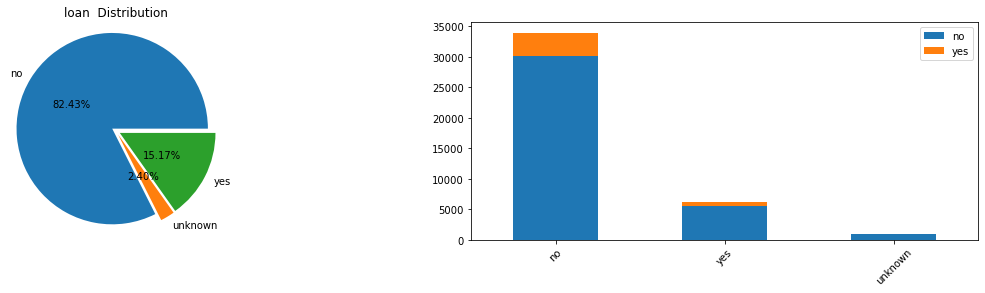

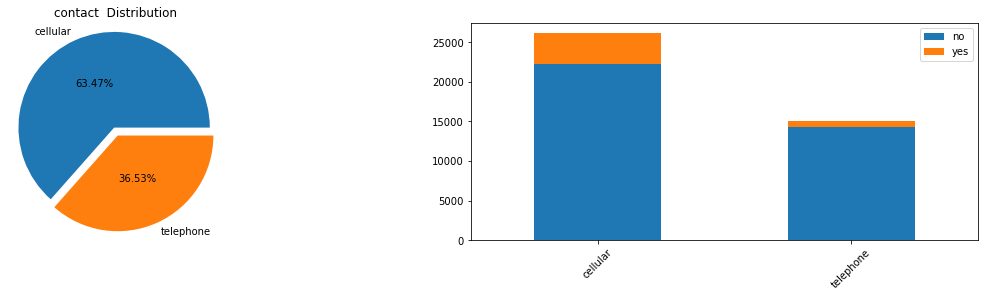

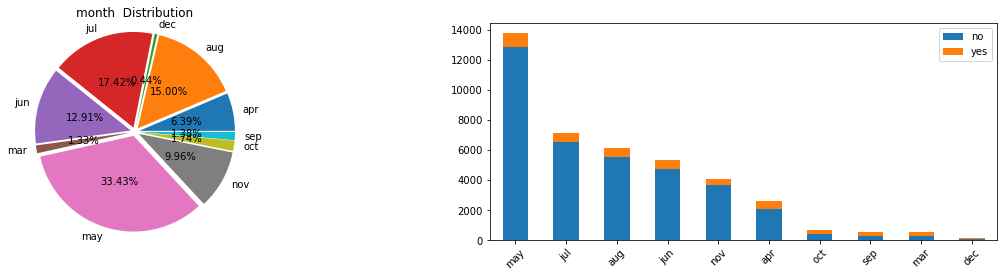

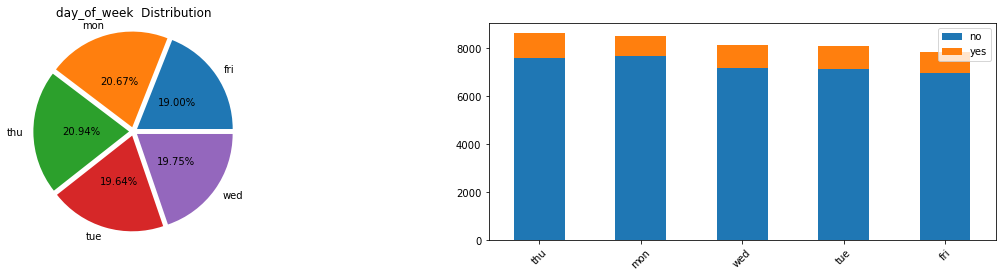

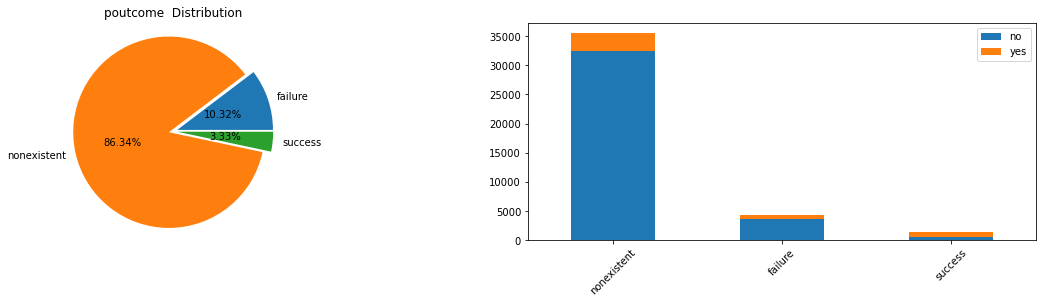

In [92]:
categorical = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
target = 'y'
for column in categorical:

    fig, (ax1,ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20,4))    
    data1 = marketing_df.groupby(column).size()
    ax1.pie(x=data1 , autopct="%.2f%%", explode=[0.05]*len(data1), labels=data1.index.tolist(),pctdistance=0.5, radius=1.1)
    ax1.set_title(f'{column}  Distribution')

    data2 = get_col_target(column, target,marketing_df)   
    data2.plot(kind='bar',stacked = True, ax=ax2);
    plt.xticks(rotation=45);
    
# Visualization các biến categorical:

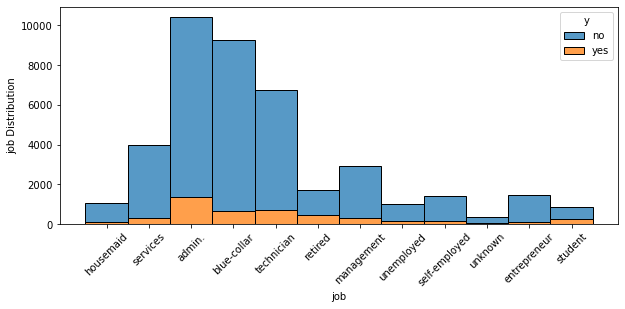

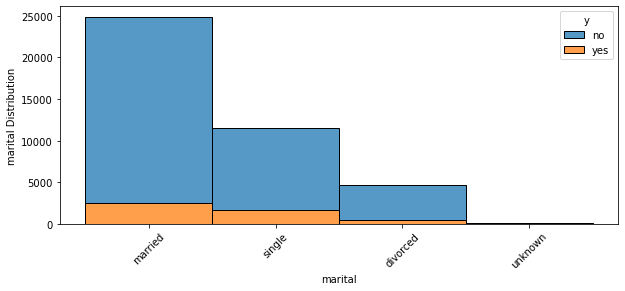

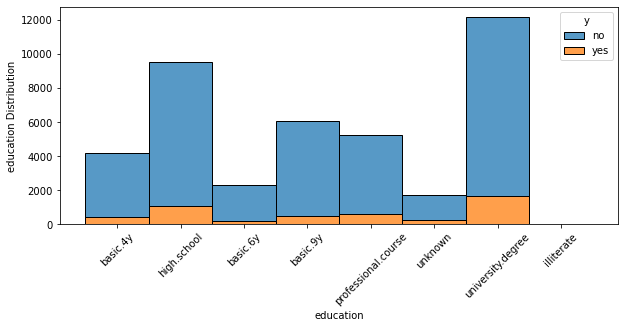

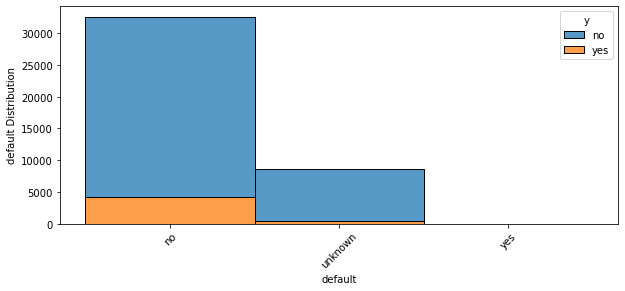

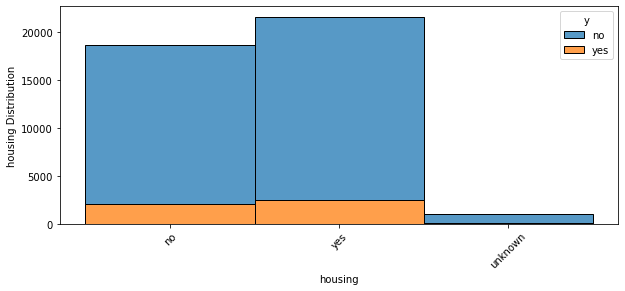

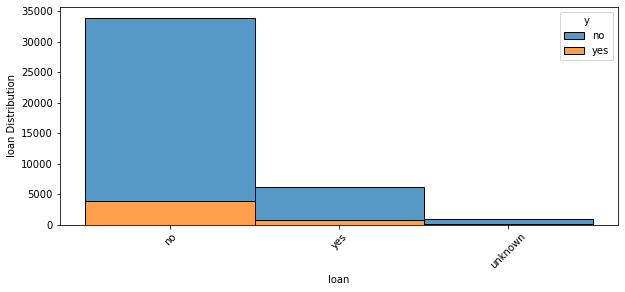

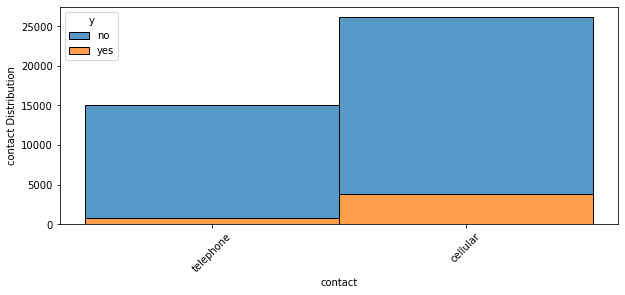

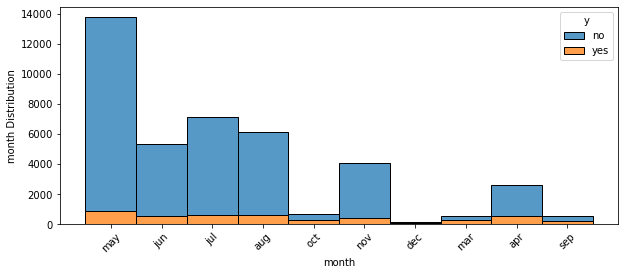

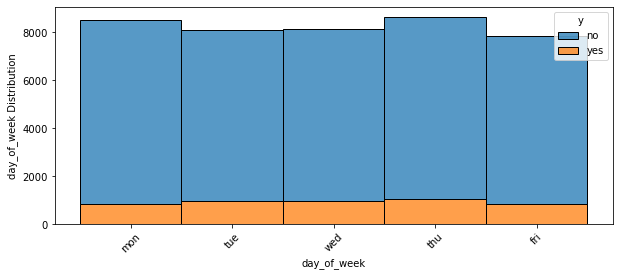

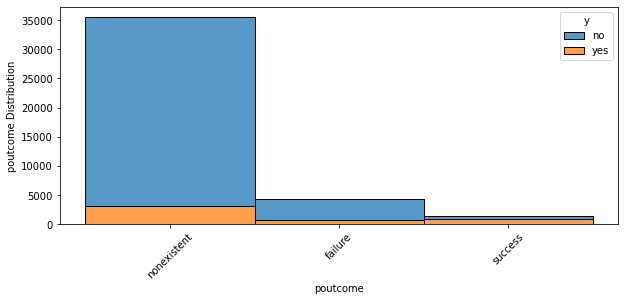

In [147]:
categorical = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
target = 'y'

for col in categorical:
    plt.figure(figsize = (10,4))
    sns.histplot(data=marketing_df, x=col,hue=target,multiple='stack')
    plt.xticks(rotation = 45)
    plt.ylabel(col+' Distribution')

(II). Categorical variables's Summary

1. *Job: Mặc dù đối tượng thực hiện trên khách hàng làm Admin là lớn nhất nhưng Tỉ lệ thành công cao lại rơi vào các nhóm đối tượng là 'retired' và 'student'

2. Marital: Tỉ lệ thành công trên 3 nhóm "married, single và divoiced là như nhau.
3. *'Education: không có sự khác biệt quá lớn giữa các nhóm đối tượng. Tuy nhiên,tỉ lệ gởi ở những đối tượng 'university.degree' và 'highschool' tương đối cao hơn so với các nhóm còn lại 

4. *Default: đối với những người đã có credit, tỉ lệ thành công là rất thấp(hâu như là 0). Trong khi đó, những người chưa có credit thì có xu hướng gởi tiết kiệm nhiều hơn

5. Housing: Tỉ lệ thành công ở nhóm không có nợ mua nhà cao hơn so với có nợ mua nhà. Tuy nhiên không vì thế mà những người đang mang khoản nợ mua nhà lại ko đồng ý gửi lãi ngân hàng.
6. Loan: Mặc dù trên 80% khách hàng được tiếp cận là không có các khoản nợ cá nhân. Tuy nhiên tỉ lệ thành công so với nhóm đối tượng có nợ cá nhân và không có nợ cá nhân khá tương đương nhau.

7. *Contact: Hơn 60% được tiếp cận thông qua cellphone và tỉ lệ thành công trên hình thức này cũng cao hơn hẳn so với telephone

8. *Month: Mặc dù chiếm đa số là các cuộc gọi đc thực hiện vào tháng 5. Tuy nhiên tỉ lệ thành công lại cao hơn khi các cuộc gọi được gọi vào tháng 3, tháng 9 và tháng 10

9. Day_of_week: không có sư khác biệt về tỉ lệ thành công khi so sánh các cuộc gọi trong các ngày làm việc khác nhau.

10. *Poutcome: Những người đã đồng ý mua sản phẩm ở chiến dịch trước lại có xu hướng đồng ý cho chiến dịch tiếp theo.


### Data correlation

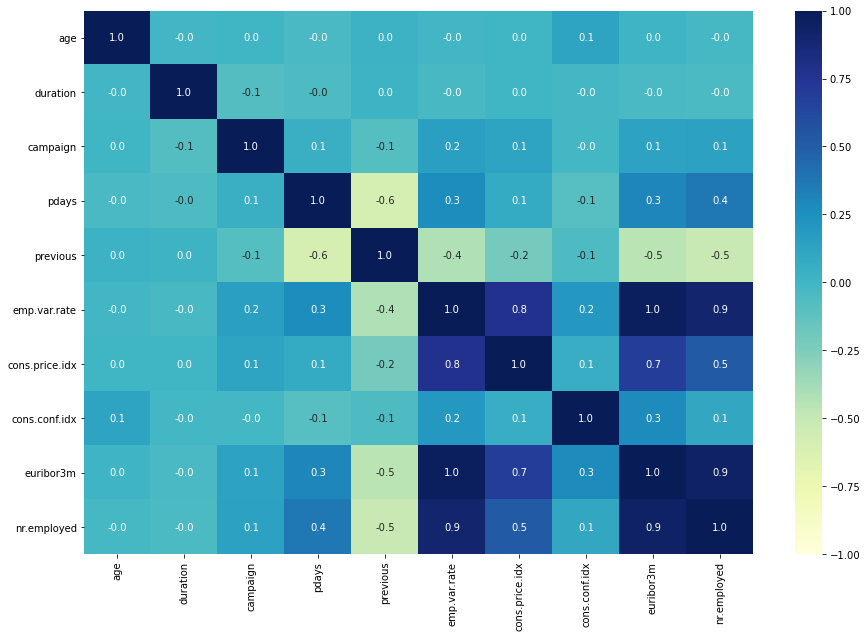

In [94]:
def show_correlation_matrix(df, vmin_val = -1, vmax_val = 1):
    f, ax = plt.subplots(figsize=(15, 10))
    #matrix = np.triu(df.corr())
    sns.heatmap(df.corr(),cmap = "YlGnBu", fmt='.1f', annot=True ,vmin= vmin_val, vmax = vmax_val)
    plt.show()

show_correlation_matrix(marketing_df,vmin_val = -1)

# Ma trận tương quan giữa các biến

1. Ta thấy nhóm các chỉ số nr.employed, emp.var.rate, euribor3m và nr.employed là nhóm có tương quan tỉ lệ thuận
> 3 biến này có yếu tố tương đồng rất cao nên ta có thể chọn 1 biến để quan sát (để giảm chiều dữ liệu)

2. previous: có tương quan tỉ lệ nghịch với nhóm biến ở mục 1, tuy nhiên những hệ số này không quá quan trọng trong phạm vi xem xét

## D A T A PROCESSING

In [115]:
marketing_df = pd.read_csv(file_path, sep=";")
marketing_df.shape

(41188, 21)

### Duplication

Có 12 dòng dữ liệu trùng nhau.
> Xóa 12 dòng trùng để đảm bảo tính chính xác

In [116]:
print('The number ofduplicated rows: '+str(len(marketing_df[marketing_df.duplicated()])))
# xóa các dòng trùng nhau
marketing_df=marketing_df.drop(marketing_df[marketing_df.duplicated()].index).reset_index(drop=True)
marketing_df.shape

The number ofduplicated rows: 12


(41176, 21)

### Reality

> Loại bỏ cột 'duration' vì nó 1 thuộc tính ảnh hưởng cao đến biến target

In [117]:
marketing_df.pop('duration')
marketing_df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y'],
      dtype='object')

### MISSING

1. Column 'pdays'
* Có đến 96.3% bộ dữ liệu thuộc tính 'pdays' có giá trị '999' - ghi nhận lại đây là những khách hàng chưa được liên hệ bằng call trước đó.
> Vì vậy đối với biến này, ta sẽ thêm 1 cột có tên 'contacted_before' nhận 2 giá trị : True-'contacted_before' và 
False-'not_contacted_before' 

In [119]:
len(marketing_df[marketing_df['pdays'] == 999])/len(marketing_df) * 100
# Tỉ lệ giá trị '999' của cột 'pdays'

96.32067223625413

In [124]:
marketing_df['contacted_before'] = marketing_df['pdays'] != 999

In [130]:
100 - marketing_df['contacted_before'].sum()/marketing_df['contacted_before'].count()*100
#Tỉ lệ khách hàng không được contacted trước đó

96.32067223625413

2. Column 'poutcome'
Tỉ lệ missing của 'poutcome' là khá lớn 86.3%.
> Vì vậy ta sẽ loại bỏ cột này ra khỏi mô hình

In [137]:
na_lst = ["NA","","#NA","unknown","nonexistent"]
len(marketing_df[marketing_df['poutcome'] == "nonexistent"])/len(marketing_df)*100

86.33912959005245

In [138]:
marketing_df.pop('poutcome')

0        nonexistent
1        nonexistent
2        nonexistent
3        nonexistent
4        nonexistent
            ...     
41171    nonexistent
41172    nonexistent
41173    nonexistent
41174    nonexistent
41175        failure
Name: poutcome, Length: 41176, dtype: object

In [139]:
marketing_df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed', 'y', 'contacted_before'],
      dtype='object')

4. Column 'default'?

5. Column 'educaion'?

6. Column 'housing'?

7. Column 'loan'?

8. Column 'job'?

9. Column 'marital'?

### OUTLIER

In [ ]:
1. Age

In [ ]:
2.Campain

In [ ]:
3.Previous

In [ ]:
4. Cons.conf.idx